<a href="https://colab.research.google.com/github/proteinovayas13/My_works/blob/main/%22%D0%BD%D0%B0%D1%85%D0%BE%D0%B6%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BB%D0%B8%D0%BA%D0%BE%D0%B2_%D0%B2_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_Titanic_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нахождение ликов в данных(избежание утечки данных)-на примере датасета Титаник, задача классификации.

## Предскзываем выживание в катастрофе на Titanik

In [ ]:
import pandas as pd
import seaborn as sns

data = sns.load_dataset('titanic')

In [ ]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import LabelEncoder

# Список категориальных колонок для обработки
cat_columns = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive', 'deck']

# Обработка каждой категориальной колонки
for col in cat_columns:
    # Проверяем, является ли колонка категориальной
    if isinstance(data[col].dtype, CategoricalDtype):
        # Добавляем '0' как новую категорию, если её нет
        if '0' not in data[col].cat.categories:
            data[col] = data[col].cat.add_categories(['0'])

    # Заполняем пропуски значением '0'
    data[col] = data[col].fillna('0')

    # Создаем и применяем LabelEncoder
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Заменяем исходную колонку

    # Для отладки: выводим соответствие значений и кодов
    print(f"{col} encoding:", dict(zip(le.classes_, le.transform(le.classes_))))


data.head()

sex encoding: {'female': np.int64(0), 'male': np.int64(1)}
embarked encoding: {'0': np.int64(0), 'C': np.int64(1), 'Q': np.int64(2), 'S': np.int64(3)}
class encoding: {'First': np.int64(0), 'Second': np.int64(1), 'Third': np.int64(2)}
who encoding: {'child': np.int64(0), 'man': np.int64(1), 'woman': np.int64(2)}
embark_town encoding: {'0': np.int64(0), 'Cherbourg': np.int64(1), 'Queenstown': np.int64(2), 'Southampton': np.int64(3)}
alive encoding: {'no': np.int64(0), 'yes': np.int64(1)}
deck encoding: {'0': np.int64(0), 'A': np.int64(1), 'B': np.int64(2), 'C': np.int64(3), 'D': np.int64(4), 'E': np.int64(5), 'F': np.int64(6), 'G': np.int64(7)}


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,3,2,1,True,0,3,0,False
1,1,1,0,38.0,1,0,71.2833,1,0,2,False,3,1,1,False
2,1,3,0,26.0,0,0,7.9250,3,2,2,False,0,3,1,True
3,1,1,0,35.0,1,0,53.1000,3,0,2,False,3,3,1,False
4,0,3,1,35.0,0,0,8.0500,3,2,1,True,0,3,0,True


In [ ]:
# Select target
y = data.survived

# Select predictors
X = data.drop(['survived'], axis=1)

print("Number of rows in th dataset:", X.shape[0])
X.head()

Number of rows in th dataset: 891


,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,3,2,1,True,0,3,0,False
1,1,0,38.0,1,0,71.2833,1,0,2,False,3,1,1,False
2,3,0,26.0,0,0,7.9250,3,2,2,False,0,3,1,True
3,1,0,35.0,1,0,53.1000,3,0,2,False,3,3,1,False
4,3,1,35.0,0,0,8.0500,3,2,1,True,0,3,0,True


survival	Выживание	0 = No, 1 = Yes

pclass	Класс билета	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Пол

Age	Возраст в годах

sibsp	Количество родителей / детей на борту «Титаника»

parch	parch-нервный

ticket	Номер билета

fare	Стоимость проезда для пассажиров

embarked- кто из оплативших поднялся на палубу

clsss-класс палубы

who-кто

abult_male-Взрослый

deck-палуба

embark_toun-камин

alive-живой

alone-один

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict

# Поскольку предварительная обработка не требуется, нам не нужен конвейер (он всё равно используется в качестве стандартной практики!).
my_pipline = make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores = cross_val_score(my_pipline, X, y,
                            cv=5,
                            scoring='accuracy')
print("cross-validation accuracy: %f" % cv_scores.mean())

cross-validation accuracy: 1.000000


Результаты кросс-валидации:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC-AUC: 1.0000


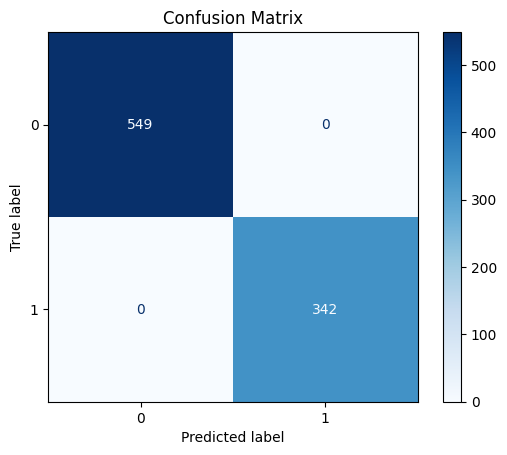

In [ ]:
scoring = ['accuracy', 'precision', 'recall', 'roc_auc']

# Вычисляем все метрики через cross_validate
cv_results = cross_validate(my_pipline, X, y,
                          cv=5,
                          scoring=scoring)

# Выводим результаты
print("Результаты кросс-валидации:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Recall: {cv_results['test_recall'].mean():.4f}")
print(f"ROC-AUC: {cv_results['test_roc_auc'].mean():.4f}")

# Строим confusion matrix
y_pred = cross_val_predict(my_pipline, X, y, cv=5)
cm = confusion_matrix(y, y_pred)

# Визуализируем матрицу ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Drop leaky predictors from dataset
potential_leaks = ['alive']
X2 = X.drop(potential_leaks, axis=1)

scoring = ['precision', 'recall', 'roc_auc', 'accuracy']

# Evaluate the model with leaky predictors removed
cv_scores = cross_val_score(my_pipline, X2, y,
                            cv=5,
                            scoring='accuracy')
print("Cross-val accuracy: %f" % cv_scores.mean())

Cross-val accuracy: 0.800251


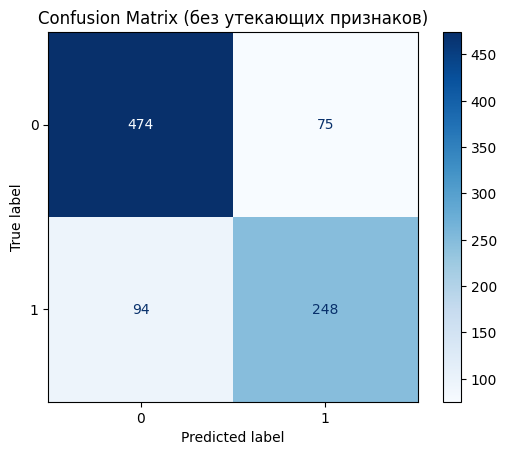

In [ ]:
y_pred = cross_val_predict(my_pipline, X2, y, cv=5)
cm = confusion_matrix(y, y_pred)

# Визуализация матрицы ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (без утекающих признаков)")
plt.show()

# Вывод
Предсказанные метрики моделью RandomForestClassifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC-AUC: 1.0000

После удалиние переменной 'alive' метрика кросс валидации ухудшилась Cross-val accuracy: 0.800251, что говорит о том что переменная 'alive' является утечкой данных, так как в катастрофе на корабле выживжие остались.